In [1]:
#Reference https://www.youtube.com/watch?v=tnaq2Ao4KBE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month']  = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


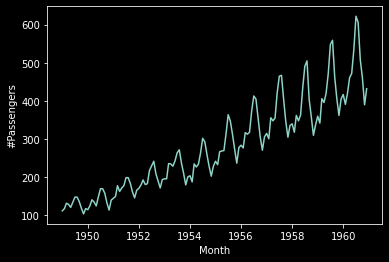

In [4]:
sns.lineplot(data=df, x='Month', y='#Passengers')

In [5]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print(f'p-value = {pvalue}; if above 0.05 the date is likelly NOT stationary')

p-value = 0.9918802434376411; if above 0.05 the date is likelly NOT stationary


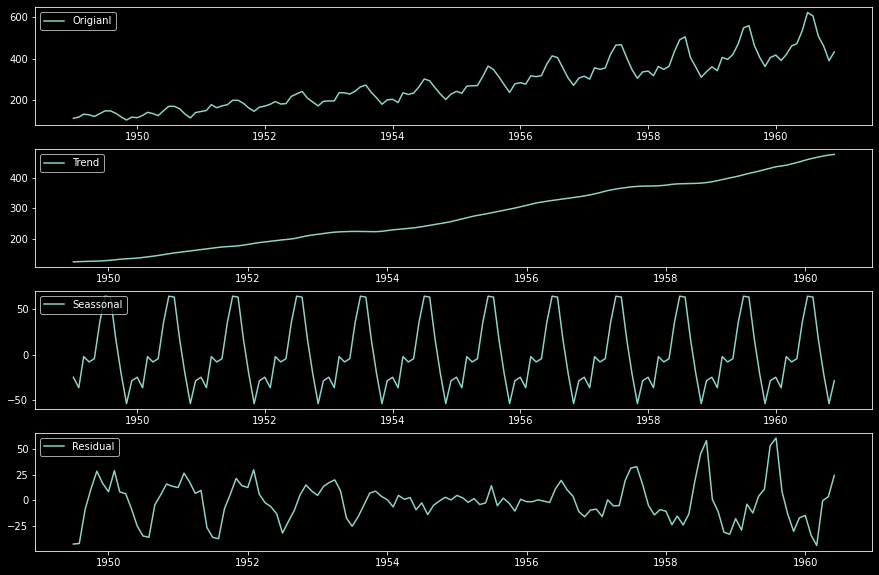

In [6]:
decomposed = seasonal_decompose(df['#Passengers'], model='additive')
trend = decomposed.trend
seassonal = decomposed.seasonal
residual = decomposed.resid
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df['#Passengers'], label= 'Origianl')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seassonal, label= 'Seassonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label= 'Residual')
plt.legend(loc='upper left')

In [27]:
#auto ARIMA
from pmdarima.arima import auto_arima

arima_model = auto_arima(df['#Passengers'], start_p=1, max_p=5, d=1, start_q=1, max_q=5,
                         max_d=5, m=12, start_P=0, max_P=5, D=1, max_D=5, start_Q=0,
                         max_Q=5, seasonal=True, trace=True, error_action='ignore',
                         suppress_warnings=True, stepwise=True, n_fits=150)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.63 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [8]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 14 Dec 2021   AIC                           1019.178
Time:                                     10:34:12   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [9]:
#split dataset
pct = int(len(df)*.66)
X_train, X_test = df[:pct], df[pct:]

In [28]:
#use SARIMAX model with the parameters gived by auto arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
# after some experimentation the best seasonal order was (2,1,1,12
model = SARIMAX(X_train['#Passengers'], order=(0,1,1), seasonal_order=(2,1,1,12))
results = model.fit()
results.summary()

/home/guilherme/anaconda3/envs/tfgpu/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/guilherme/anaconda3/envs/tfgpu/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Tue, 14 Dec 2021   AIC                            610.539
Time:                                    11:17:43   BIC                            622.573
Sample:                                01-01-1949   HQIC                           615.370
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3207      0.103     -3.127      0.002      -0.522      -0.120
ar.S.L12       0.6841      0.641      1.067      0.286      -0.573       1.941
ar.S.L24       0.3144      0.138      2.274      0.023       0.043       0.585
ma.S.L12      -0.9785      5.121     -0.191      0.848     -11.015       9.058
sigma2        78.8138    353.028      0.223      0.823    -613.109     770.736
===================================================================================
Ljung-Box (Q):                       34.65   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.71   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

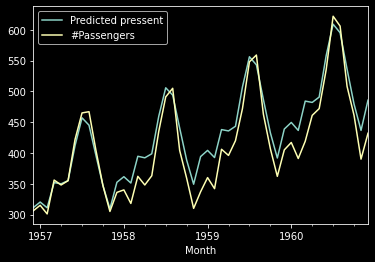

In [29]:
#predict
prediction = results.predict(len(X_train), len(df)-1).rename('Predicted pressent')

prediction.plot(legend=True)
X_test['#Passengers'].plot(legend=True)

In [30]:
#RMSE
import math
from sklearn.metrics import mean_squared_error

test_score = math.sqrt(mean_squared_error(X_test, prediction))
print(f'Test score: {test_score:.2f} RMSE')

Test score: 29.48 RMSE


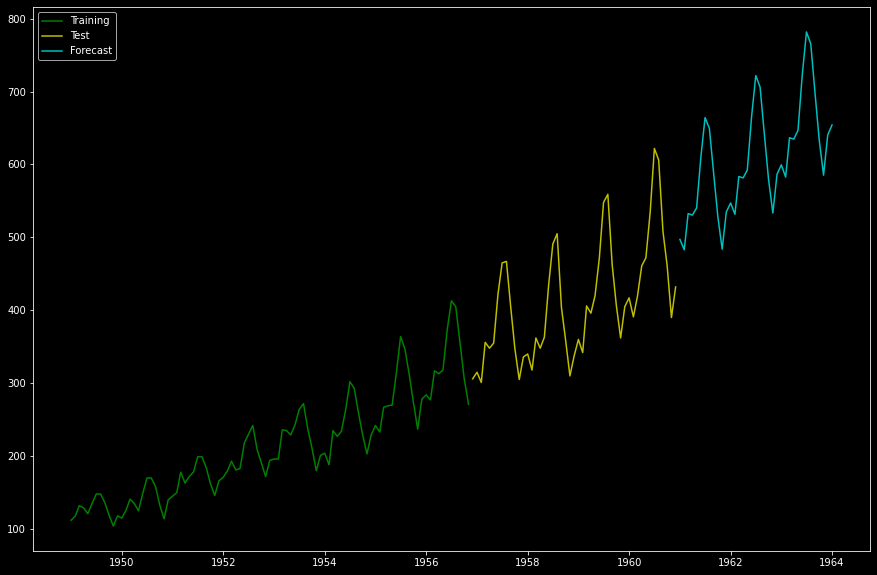

In [31]:
#Forecasting 3 years
forecast = results.predict(start=len(df), end=len(df)+3*12, type='levels').rename('forecast')
plt.figure(figsize=(15,10))
plt.plot(X_train, label='Training', color='g')
plt.plot(X_test, label='Test', color='y')
plt.plot(forecast, label='Forecast', color='c')
plt.legend()